In [5]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry as country #To get countries population
import wbdata
import warnings #We are working with filtered dataframes
warnings.filterwarnings('ignore')

import requests


In [6]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [8]:
url = 'https://www.kaggle.com/datasets/mattop/alcohol-consumption-per-capita-2016/download?datasetVersionNumber=1'

In [11]:
req = requests.get(url)

In [15]:
!kaggle datasets download -d mattop/alcohol-consumption-per-capita-2016

zsh:1: command not found: kaggle


## 1. Data Preparation

In [3]:
# DataFrame
alc_consum = pd.read_csv('alcohol-consumption.csv')

In [4]:
#Empty or null values

#The same 10 countries have null or empty values
alc_consum.isnull().sum()

country                    0
total_consumption          0
recorded_consumption       0
unrecorded_consumption     0
beer_percentage           10
wine_percentage           10
spirits_percentage        10
other_percentage          10
2020_projection            0
2025_projection            0
dtype: int64

In [5]:
#null values country

#Column beer_percentage is just 

nulls = alc_consum[alc_consum['beer_percentage'].isnull() == True]

Explanation: In these 10 countires drinking alcohol is illegal

We will take them out as we cannot use them for this study.


In [6]:
# New dataframe to use
alc_consum = alc_consum[alc_consum['beer_percentage'].isnull() == False]

## 2. Data Preparation

I want to know the countries with more alcohol consumption, classified by the type of alcohol.

1. Step: Take countries Alpha ISO 3166-1 with 3 letter
2. Take the population of each country for 2016
3. EDA and statistics

In [7]:
#Iso 3166-1

#Create dict with all the alpha 3166-1
country_list = {i.name: i.alpha_3 for i in country.countries} 


In [8]:
#Renaming countries according the pycountry API
alc_consum['country'].replace({'Czech Republic':'Czechia',
                               'Moldova':'Moldova, Republic of',
                               'Russia':'Russian Federation',
                               'Laos':"Lao People's Democratic Republic",
                               'South Korea':'Korea, Republic of',
                               'Tanzania':'Tanzania, United Republic of',
                               'Ivory Coast':"Côte d'Ivoire",
                               'Vietnam':'Viet Nam',
                               'São Tomé and Príncipe':'Sao Tome and Principe',
                               'Cape Verde':'Cabo Verde',
                               'Venezuela':'Venezuela, Bolivarian Republic of',
                               'Bolivia':'Bolivia, Plurinational State of',
                               'North Korea':"Korea, Democratic People's Republic of",
                               'DR Congo':'Congo, The Democratic Republic of the',
                               'Micronesia':'Micronesia, Federated States of',
                               'East Timor':'Timor-Leste',
                               'Brunei':'Brunei Darussalam',
                               'Syria':'Syrian Arab Republic'
                              }, inplace=True)


In [9]:
#Create column with alpha2 ISO 3166-1

alpha_country = [country_list[i] for i in alc_consum.country]
alc_consum['alpha3'] = alpha_country

len(alc_consum['alpha3'])

179

In [10]:
#World Bank API
wbdata.get_source(40)
wbdata.get_indicator(source=40)

#World population code
data = wbdata.get_data('SP.POP.TOTL')

#Year 2016
df = pd.DataFrame(data)
df = df[df['date']=='2016']
df = df[['countryiso3code', 'date', 'value']]
df = df.set_index(df['countryiso3code']) #Set index for a better search

In [11]:
#Join data between population and alcohol consumption
ind = alc_consum.set_index('alpha3') #Index alpha3 fro the join
ind = ind.join(df)
ind = ind.reset_index(drop=True)

#Manually adding population for Cook island, Eritrea and Niue island
ind.value.loc[35] = 17459
ind.value.loc[51] = 4954645
ind.value.loc[120] = 1614


In [12]:
ind

,country,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,2020_projection,2025_projection,countryiso3code,date,value
0,Angola,6.40000,5.00000,1.40000,70.30000,17.60000,11.30000,0.80000,6.10000,6.60000,AGO,2016,28842482.00000
1,Albania,7.50000,5.00000,2.50000,34.30000,26.50000,37.60000,1.70000,8.30000,9.20000,ALB,2016,2876101.00000
2,Andorra,11.30000,10.10000,1.60000,34.10000,42.00000,23.90000,0.00000,11.00000,10.50000,AND,2016,77295.00000
3,United Arab Emirates,3.80000,2.10000,1.80000,10.10000,7.70000,81.90000,0.30000,4.20000,5.50000,ARE,2016,9360975.00000
4,Argentina,9.80000,8.40000,1.30000,39.90000,40.20000,9.60000,10.30000,10.00000,10.30000,ARG,2016,43590368.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,Samoa,2.50000,2.00000,0.70000,94.10000,5.90000,0.00000,0.00000,2.90000,3.30000,WSM,2016,194540.00000
175,Yemen,0.10000,0.00000,0.00000,89.50000,0.00000,10.50000,0.00000,0.10000,0.10000,YEM,2016,27168210.00000
176,South Africa,9.30000,7.10000,2.20000,56.00000,18.50000,17.80000,7.60000,9.20000,9.00000,ZAF,2016,56207649.00000
177,Zambia,4.80000,2.90000,2.00000,36.40000,2.70000,0.40000,60.40000,4.80000,4.70000,ZMB,2016,16363449.00000


In [13]:
#Column re-name value to population_2016
ind.columns = ['country', 'total_consumption', 'recorded_consumption',
       'unrecorded_consumption', 'beer_percentage', 'wine_percentage',
       'spirits_percentage', 'other_percentage', '2020_projection',
       '2025_projection', 'countryiso3code', 'date', 'population_2016']

#Column filtering, taking out countryiso3code and date
ind = ind[['country', 'total_consumption', 'recorded_consumption',
       'unrecorded_consumption', 'beer_percentage', 'wine_percentage',
       'spirits_percentage', 'other_percentage', '2020_projection',
       '2025_projection', 'population_2016']]

In [14]:
ind['beer_consumption_2016'] = (ind['total_consumption'] * (ind['beer_percentage']/100)) / ind['population_2016']
ind['wine_consumption_2016'] = (ind['total_consumption'] * (ind['wine_percentage']/100)) / ind['population_2016']

In [15]:

top_beer_country = ind.sort_values('beer_consumption_2016', ascending=False)
top_beer_country.drop(top_beer_country.columns[-1], axis=1, inplace=True)
top_beer_country.head(10)

,country,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,2020_projection,2025_projection,population_2016,beer_consumption_2016
120,Niue,7.00000,6.00000,1.00000,56.30000,13.10000,30.60000,0.00000,7.00000,7.00000,1614.00000,0.00244
35,Cook Islands,10.60000,10.00000,0.60000,31.70000,16.10000,52.20000,0.00000,16.20000,18.30000,17459.00000,0.00019
124,Nauru,6.00000,3.50000,2.50000,22.00000,3.70000,74.30000,0.00000,0.00000,6.30000,10474.00000,0.00013
151,Seychelles,13.80000,12.40000,1.40000,68.90000,22.40000,6.30000,2.50000,10.40000,10.60000,94677.00000,0.00010
90,Saint Kitts and Nevis,9.40000,8.90000,0.50000,47.80000,6.50000,43.40000,2.30000,9.70000,10.30000,51629.00000,0.00009
2,Andorra,11.30000,10.10000,1.60000,34.10000,42.00000,23.90000,0.00000,11.00000,10.50000,77295.00000,0.00005
68,Grenada,9.30000,8.80000,1.40000,40.90000,7.00000,48.30000,3.80000,9.40000,9.60000,110263.00000,0.00003
170,Saint Vincent and the Grenadines,8.20000,7.40000,1.40000,36.60000,3.60000,57.20000,2.60000,8.40000,8.70000,109467.00000,0.00003
6,Antigua and Barbuda,7.00000,8.40000,1.20000,33.00000,18.30000,45.40000,3.20000,7.60000,8.40000,94520.00000,0.00002
95,Saint Lucia,9.90000,9.70000,1.50000,35.40000,13.20000,50.00000,1.40000,9.60000,9.10000,180028.00000,0.00002


In [16]:
top_wine_country = ind.sort_values('wine_consumption_2016', ascending=False)
top_wine_country.drop(top_wine_country.columns[-2], axis=1, inplace=True)
top_wine_country.head(10)

,country,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,2020_projection,2025_projection,population_2016,wine_consumption_2016
120,Niue,7.00000,6.00000,1.00000,56.30000,13.10000,30.60000,0.00000,7.00000,7.00000,1614.00000,0.00057
163,Tuvalu,1.70000,1.20000,0.50000,0.60000,84.70000,14.10000,0.00000,1.70000,1.70000,11232.00000,0.00013
35,Cook Islands,10.60000,10.00000,0.60000,31.70000,16.10000,52.20000,0.00000,16.20000,18.30000,17459.00000,0.00010
2,Andorra,11.30000,10.10000,1.60000,34.10000,42.00000,23.90000,0.00000,11.00000,10.50000,77295.00000,0.00006
151,Seychelles,13.80000,12.40000,1.40000,68.90000,22.40000,6.30000,2.50000,10.40000,10.60000,94677.00000,0.00003
145,Sao Tome and Principe,6.80000,4.90000,2.00000,19.80000,80.20000,0.00000,0.00000,7.10000,7.40000,203221.00000,0.00003
124,Nauru,6.00000,3.50000,2.50000,22.00000,3.70000,74.30000,0.00000,0.00000,6.30000,10474.00000,0.00002
6,Antigua and Barbuda,7.00000,8.40000,1.20000,33.00000,18.30000,45.40000,3.20000,7.60000,8.40000,94520.00000,0.00001
99,Luxembourg,12.30000,10.60000,2.10000,26.10000,61.50000,7.70000,4.70000,11.80000,11.00000,582014.00000,0.00001
90,Saint Kitts and Nevis,9.40000,8.90000,0.50000,47.80000,6.50000,43.40000,2.30000,9.70000,10.30000,51629.00000,0.00001


## EDA

Text(0, 0.5, '2016 consum')

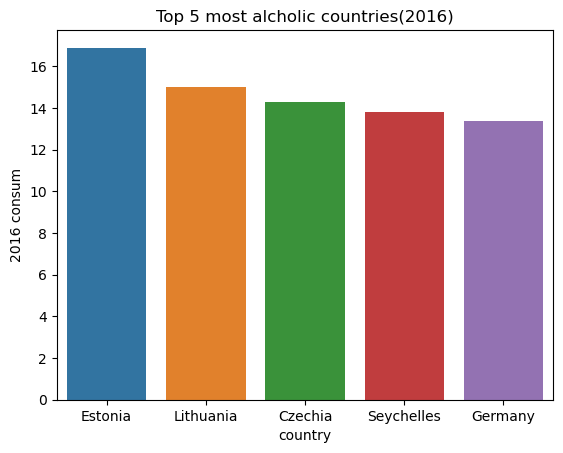

In [38]:

#Filtering by previsions
consum = ind[["country", "total_consumption","2020_projection", "2025_projection"]]
consum_2016 = consum.sort_values('total_consumption', ascending=False).head(5)

consum_2016_consum = sns.barplot(x=consum_2016.country, y=consum_2016.total_consumption)
consum_2016_consum.set_title('Top 5 most alcholic countries(2016)')
consum_2016_consum.set_ylabel('2016 consum')

Text(0.5, 0, 'Countries')

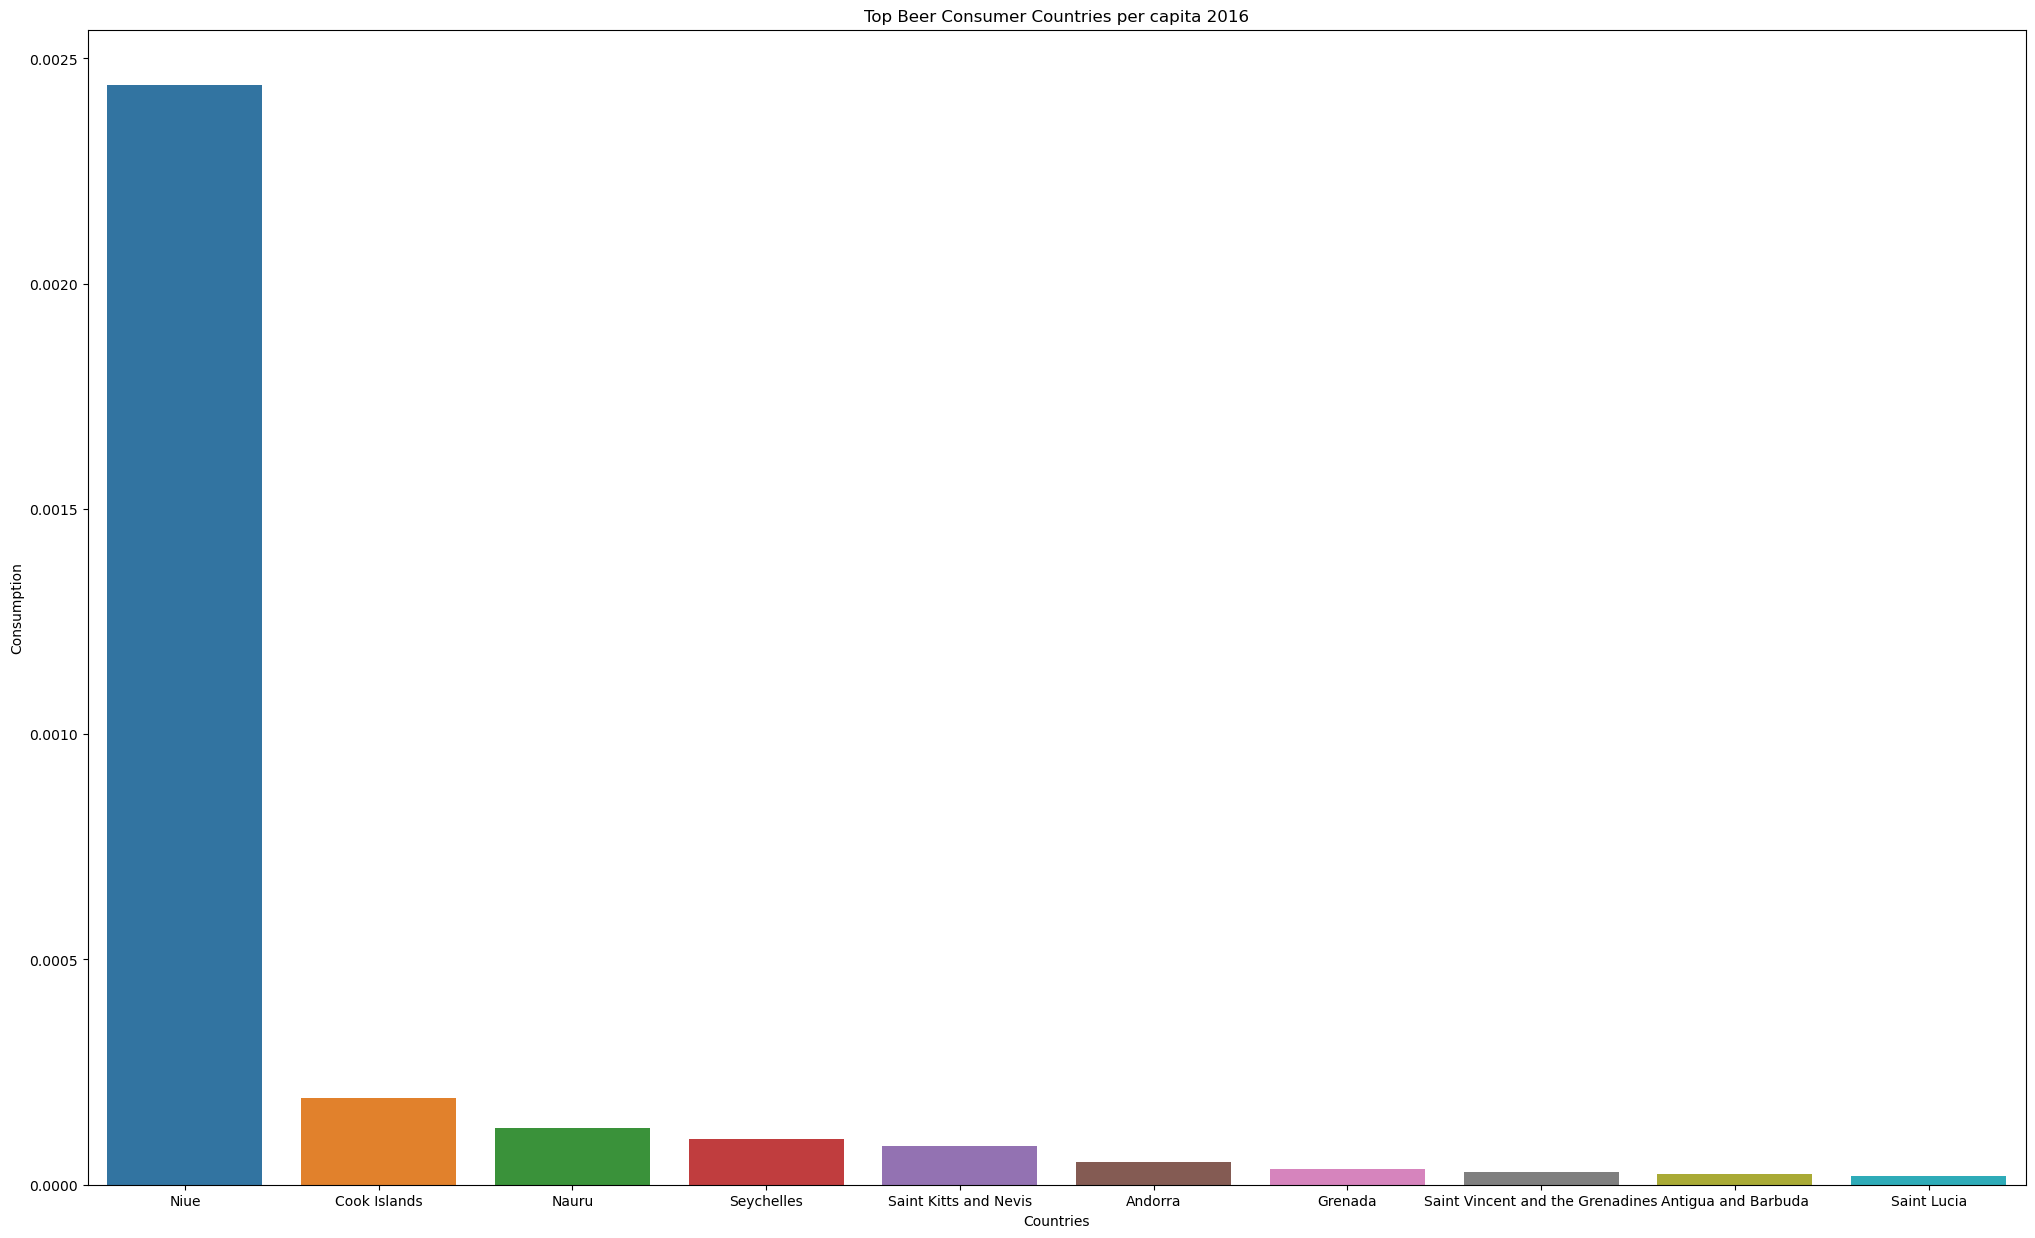

In [35]:
fig, ax = plt.subplots(figsize=(25, 15))
beer_graph = sns.barplot(x=top_beer_country['country'].head(10), y=top_beer_country['beer_consumption_2016'].head(10), ax=ax, capsize=1)
beer_graph.set_title('Top Beer Consumer Countries per capita 2016')
beer_graph.set_ylabel('Consumption')
beer_graph.set_xlabel('Countries')

Text(0.5, 0, 'Countries')

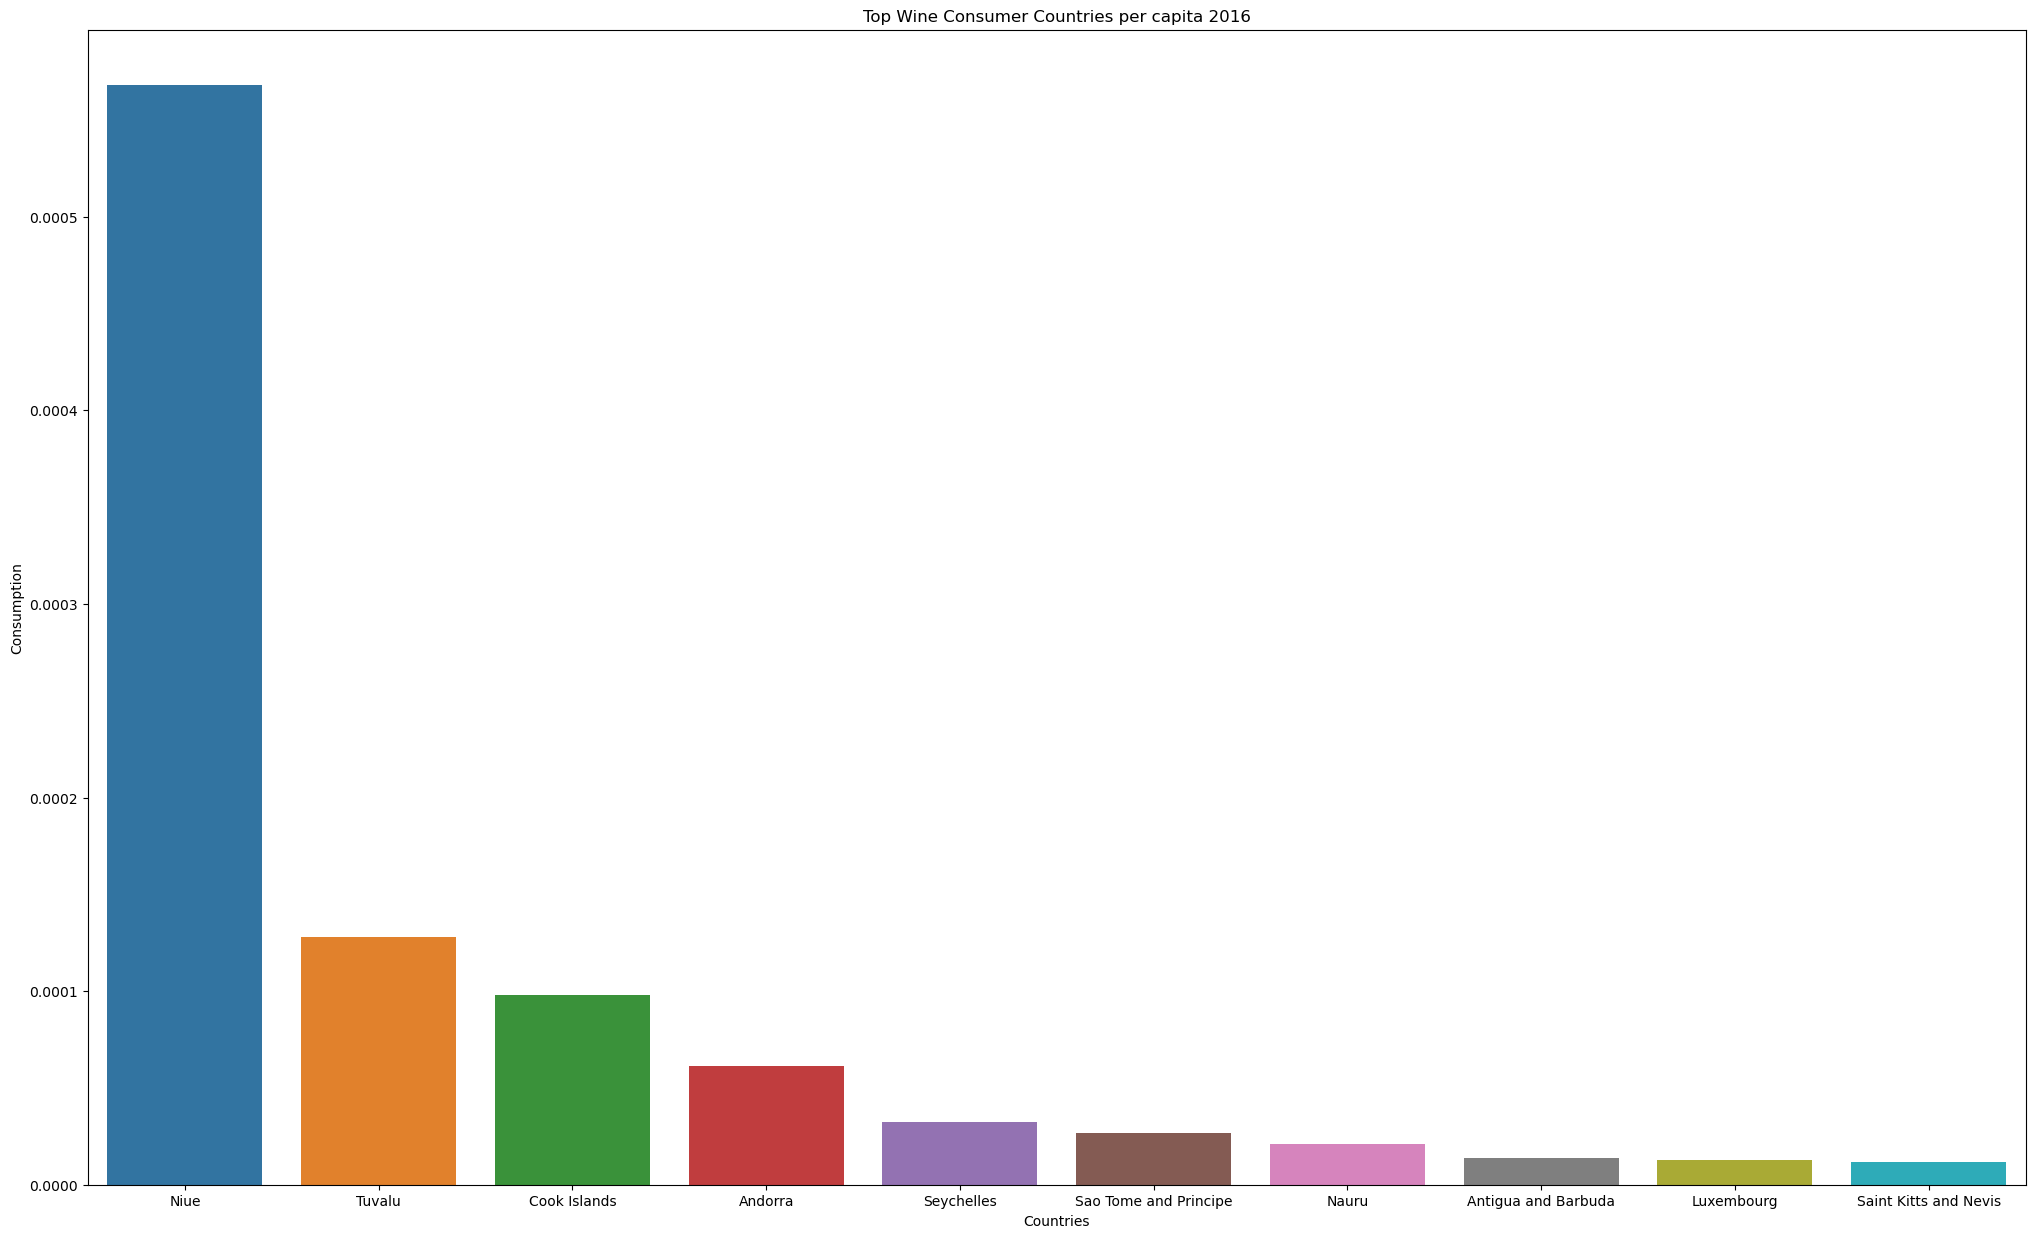

In [34]:
fig, ax = plt.subplots(figsize=(25, 15))
wine_graph = sns.barplot(x=top_wine_country['country'].head(10), y=top_wine_country['wine_consumption_2016'].head(10), ax=ax, capsize=1)
wine_graph.set_title('Top Wine Consumer Countries per capita 2016')
wine_graph.set_ylabel('Consumption')
wine_graph.set_xlabel('Countries')

Text(0, 0.5, '2020 consum')

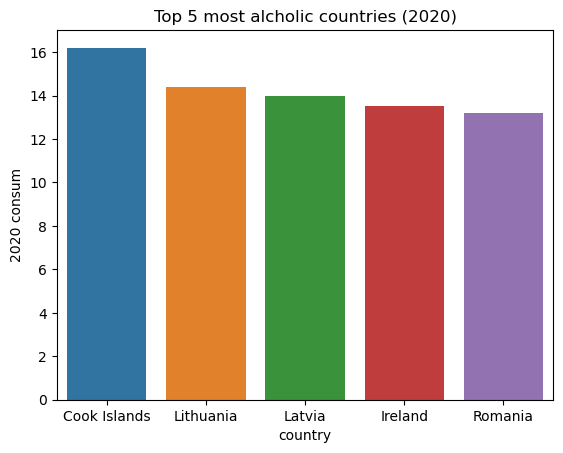

In [37]:
consum_2020 = consum.sort_values('2020_projection', ascending=False).head(5)
consum_2020_consum = sns.barplot(x=consum_2020.country, y=consum_2020['2020_projection'])
consum_2020_consum.set_title('Top 5 most alcholic countries (2020)')
consum_2020_consum.set_ylabel('2020 consum')

Text(0, 0.5, '2025 consum')

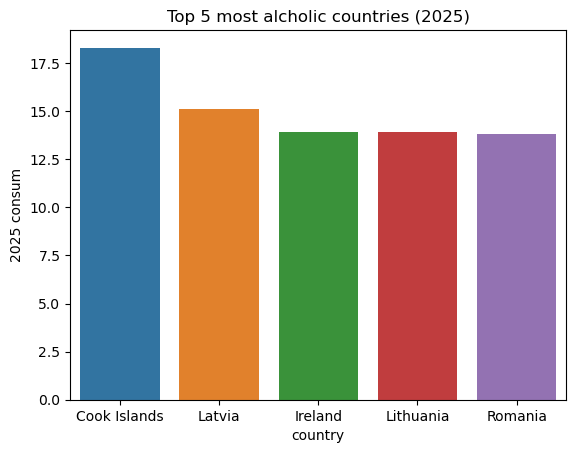

In [22]:
consum_2025 = consum.sort_values('2025_projection', ascending=False).head(5)
consum_2025_consum = sns.barplot(x=consum_2025.country, y=consum_2025['2025_projection'])
consum_2025_consum.set_title('Top 5 most alcholic countries (2025)')
consum_2025_consum.set_ylabel('2025 consum')

Cook Island has the biggest alcohol consumption previsions. This is what the local news said:

https://www.cookislandsnews.com/internal/national/health/not-a-proud-record-cook-islands-biggest-drinkers-in-the-world/

## STATS

Asumming the percentaje of wine and beer consumption remains the same to 2025

In [23]:
wine_previsions = ind[['wine_percentage', ]]

In [24]:
ind

,country,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,2020_projection,2025_projection,population_2016,beer_consumption_2016,wine_consumption_2016
0,Angola,6.40000,5.00000,1.40000,70.30000,17.60000,11.30000,0.80000,6.10000,6.60000,28842482.00000,0.00000,0.00000
1,Albania,7.50000,5.00000,2.50000,34.30000,26.50000,37.60000,1.70000,8.30000,9.20000,2876101.00000,0.00000,0.00000
2,Andorra,11.30000,10.10000,1.60000,34.10000,42.00000,23.90000,0.00000,11.00000,10.50000,77295.00000,0.00005,0.00006
3,United Arab Emirates,3.80000,2.10000,1.80000,10.10000,7.70000,81.90000,0.30000,4.20000,5.50000,9360975.00000,0.00000,0.00000
4,Argentina,9.80000,8.40000,1.30000,39.90000,40.20000,9.60000,10.30000,10.00000,10.30000,43590368.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,Samoa,2.50000,2.00000,0.70000,94.10000,5.90000,0.00000,0.00000,2.90000,3.30000,194540.00000,0.00001,0.00000
175,Yemen,0.10000,0.00000,0.00000,89.50000,0.00000,10.50000,0.00000,0.10000,0.10000,27168210.00000,0.00000,0.00000
176,South Africa,9.30000,7.10000,2.20000,56.00000,18.50000,17.80000,7.60000,9.20000,9.00000,56207649.00000,0.00000,0.00000
177,Zambia,4.80000,2.90000,2.00000,36.40000,2.70000,0.40000,60.40000,4.80000,4.70000,16363449.00000,0.00000,0.00000
